# S08 T01 Hypotheis testing
Dataset de datos deportivos

In [147]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [148]:
df = pd.read_csv("Football teams.csv")
df.head(10)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85
6,Juventus,Serie A,77,15.7,76,6,55.4,88.3,11.4,6.85
7,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
8,Borussia Dortmund,Bundesliga,75,14.6,43,1,57.5,85.5,12.8,6.84
9,Atletico Madrid,LaLiga,67,12.1,100,0,51.8,83.1,14.4,6.84


## Content
Each row contains information for a team. The data shows following statistics for each team:

* Team - Name of team
* Tournament - Name of tournament
* Goals - Number of goals scored in the tournament in year 2020-2021
* Shots pg - Number of shots per game
* Yellow_cards - Number of yellow cards given in the tournament in year 2020-2021
* Red_cards - Number of red cards given in the tournament in year 2020-2021
* Possession% - Percentage of possession
* Pass% - Percentage of passes
* Aerials won - Aerial duels won per game. Aerial duels occur when two players contest a ball in the air; this is a symmetrical event because neither player starts with possession.

In [149]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [150]:
# hay variables sin valor?
df.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

## Exercici 1 
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 
Uso la variable yellow_cards

In [151]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = df.yellow_cards
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.983, p=0.232
Probably Gaussian


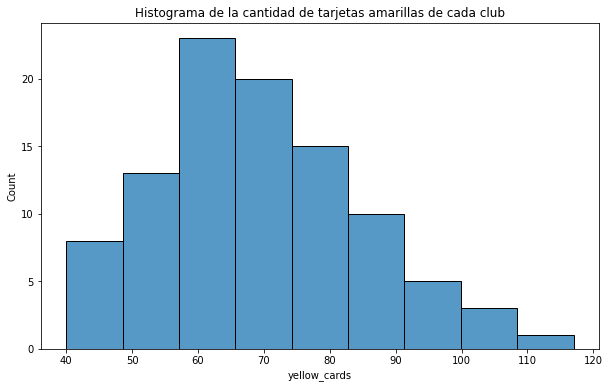

In [152]:
# Histograma de las tarjetas amarillas de cada club
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='yellow_cards', bins=9)

plt.title('Histograma de la cantidad de tarjetas amarillas de cada club');

In [153]:
print(f'La media de tarjetas amarillas en esta muestra: {df.yellow_cards.mean():.3f}')

La media de tarjetas amarillas en esta muestra: 69.704


El dataset tiene 98 clubes que participaron de un torneo determinado. Creemos que en este torneo se pusieron muchas tarjetas amarillas y que la media de la población es de 68 tarjetas por torneo. Es posible?


Como hipóteis nula vamos a suponer que los clubes obtienen, como mucho, una media de 68 tarjetas amarillas por torneo.

* $H_0: \mu_M <= 68$ Los clubes reciben una media de 68 o menos tarjetas amarillas por torneo
* $H_1: \mu_M > 68$ Los clubes obtienen una media mayor a 68 tarjetas amarillas por torneo

Nuestra muestra de media 69.704 permite rechazar dicha $H_0$?

In [154]:
# Uso scipy.stats.ttest_1samp

ALPHA = 0.05
media_pop = 68

stat, p = ttest_1samp(df.yellow_cards, popmean = media_pop, alternative = 'greater')

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = 1.114
p-value = 0.134
We can not reject H0


Este dataset de muestra no permite rechazar la $H_0$. Por lo tanto es posible que la media de la población sea de 68 o menos. 

Que pasaría si cambiamos las hipótesis?

* $H_0: \mu_M <= 67$ Los clubes reciben una media de 67 o menos tarjetas amarillas por torneo
* $H_1: \mu_M > 67$ Los clubes obtienen una media mayor a 67 tarjetas amarillas por torneo

In [155]:
# Uso scipy.stats.ttest_1samp

ALPHA = 0.05
media_pop = 65

stat, p = ttest_1samp(df.yellow_cards, popmean = media_pop, alternative = 'greater')

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = 3.076
p-value = 0.001
We can reject H0


En este caso podemos rechazar la hipótesis nula, por lo tanto la muestra demuestra que la media de la población no es ni 67 ni menor, con un nivel de confianza del 95%.

## Exercici 2
Analizar las medias de dos muestras de datos para ver si podemos decir que son las mismas

* $H_0: \mu_1 = \mu_2$ Las dos muestras tienen la misma media
* $H_1: \mu_1  != \mu_2$ Las muestras tienen distinta media

In [156]:

ALPHA = 0.05

muestra1 = df.Goals.sample(30, random_state =2)
muestra2 = df.Goals.sample(50, random_state =2)

stat, p = ttest_ind(muestra1,muestra2, alternative='two-sided', equal_var=False)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = 0.256
p-value = 0.799
We can not reject H0


Las muestras obtenidas no son lo suficientemente distintas como para asegurar que no pertenecen a la misma población. 

In [157]:
# Si pruebo con dos variables distintas es probable que no tengan la misma media:

ALPHA = 0.05

muestra1 = df.Goals
muestra2 = df.yellow_cards

stat, p = ttest_ind(muestra1,muestra2, alternative='two-sided', equal_var=False)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = -7.760
p-value = 0.000
We can reject H0


Con un nivel de confianza del 95% podemos decir que las muestras no tienen la misma media.

## Exercici 3
Realizar la misma comparación pero con tres muestras

In [158]:
pd.unique(df['Tournament'].values)

array(['Premier League', 'Bundesliga', 'Ligue 1', 'LaLiga', 'Serie A'],
      dtype=object)

<AxesSubplot:xlabel='yellow_cards', ylabel='Count'>

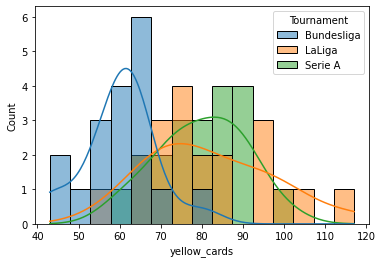

In [159]:
sns.histplot(data=df[df.Tournament.str.match('LaLiga|Serie A|Bundesliga')], x='yellow_cards', hue='Tournament', kde=True, bins=15)

Tengo tres muestras y quiero saber si las tres tienen la misma media:

La Hipotesis será:

* $H_0: \mu_1 = \mu_2 = \mu_3$ Las tres medias son iguales
* $H_1$: Las tres medias no son iguales

In [160]:
# Test ANOVA para 3 muestras

ALPHA = 0.05

muestra1 = df.loc[df.Tournament=='LaLiga','yellow_cards']
muestra2 = df.loc[df.Tournament=='Serie A','yellow_cards']
muestra3 = df.loc[df.Tournament=='Bundesliga','yellow_cards']

stat, p = f_oneway(muestra1, muestra2, muestra3)

print(f'F-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

F-statistic = 19.102
p-value = 0.000
We can reject H0


Podemos rechazar la hipótesis de que las muestras son iguales con un nivel de confianza del 95%

Puedo rechazar la hipótesis de que las tres medias son iguales con un nivel de confianza del 95%. 

Pero sería interesante saber cuales de las medias mo coinciden. 

In [161]:
# Comparación de múltiples muestras de a pares (Tukey HSD)

ALPHA = 0.05

m_comp = pairwise_tukeyhsd(endog=df['yellow_cards'], groups=df['Tournament'], alpha=ALPHA)

print(m_comp)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------
    Bundesliga         LaLiga  21.8944  0.001  12.0692  31.7197   True
    Bundesliga        Ligue 1  10.8944  0.022   1.0692  20.7197   True
    Bundesliga Premier League  -5.3056 0.5555 -15.1308   4.5197  False
    Bundesliga        Serie A  19.7944  0.001   9.9692  29.6197   True
        LaLiga        Ligue 1    -11.0 0.0158 -20.5632  -1.4368   True
        LaLiga Premier League    -27.2  0.001 -36.7632 -17.6368   True
        LaLiga        Serie A     -2.1    0.9 -11.6632   7.4632  False
       Ligue 1 Premier League    -16.2  0.001 -25.7632  -6.6368   True
       Ligue 1        Serie A      8.9 0.0809  -0.6632  18.4632  False
Premier League        Serie A     25.1  0.001  15.5368  34.6632   True
----------------------------------------------------------------------


Con este test se ven los pares de medias que podemos suponer que no son iguales con un nivel de confianza del 95%